In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('Automobile_insurance_fraud.csv')  # read the data
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
# Check the columns names
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
#first drop unnessesary column then remove duplicates & recheck the size
data=data.drop(columns=['policy_number','_c39','insured_education_level', 'incident_date','policy_bind_date','insured_occupation','insured_relationship','incident_location'],axis=1)

data.drop_duplicates(inplace=True)

print(data.shape)

(1000, 32)


In [5]:
# check the no. of rows & column & finding the count of missing value
print(data.isna().sum())

#printing the summary of data type
data.info() 

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_hobbies                0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model                     0
auto_year 

In [6]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000,1000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,NaN,3,3,NaN,NaN,NaN,NaN,2,20,...,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,OH,250/500,NaN,NaN,NaN,NaN,FEMALE,reading,...,NaN,?,NaN,NaN,NaN,NaN,Suburu,RAM,NaN,N
freq,NaN,NaN,352,351,NaN,NaN,NaN,NaN,537,64,...,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.954000,38.948000,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,NaN,NaN,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN
std,115.113174,9.140287,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,NaN,NaN,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN
min,0.000000,19.000000,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,NaN,NaN,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,115.750000,32.000000,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,NaN,NaN,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN
50%,199.500000,38.000000,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,NaN,NaN,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN
75%,276.250000,44.000000,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,NaN,NaN,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN


In [7]:
# Find the '?' in all the features
unkonwn={}
for i in list(data.columns):
    if (data[i]).dtype==object:
        a=np.sum(data[i]=="?")
        unkonwn[i]=a
unkonwn=pd.DataFrame.from_dict(unkonwn,orient='index')
unkonwn

,0
policy_state,0
policy_csl,0
insured_sex,0
insured_hobbies,0
incident_type,0
collision_type,178
incident_severity,0
authorities_contacted,0
incident_state,0
incident_city,0


In [8]:
print(data['collision_type'].mode())
print(data['police_report_available'].mode())
print(data['property_damage'].mode())


data["police_report_available"]=data["police_report_available"].replace("?",'NO')
data["collision_type"]=data["collision_type"].replace("?",'Rear Collision')
data["property_damage"]=data["property_damage"].replace("?",'NO')

0    Rear Collision
dtype: object
0     ?
1    NO
dtype: object
0    ?
dtype: object


In [9]:
# lets check again
# Find the '?' in all the features
unkonwn={}
for i in list(data.columns):
    if (data[i]).dtype==object:
        a=np.sum(data[i]=="?")
        unkonwn[i]=a
unkonwn=pd.DataFrame.from_dict(unkonwn,orient='index')
unkonwn

,0
policy_state,0
policy_csl,0
insured_sex,0
insured_hobbies,0
incident_type,0
collision_type,0
incident_severity,0
authorities_contacted,0
incident_state,0
incident_city,0


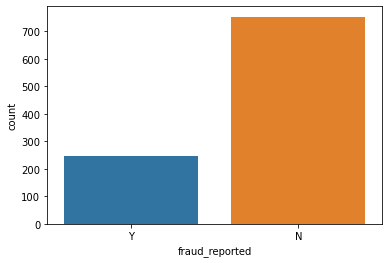

In [10]:
#plot each class frequency
sns.countplot(x='fraud_reported',data=data)
plt.show()

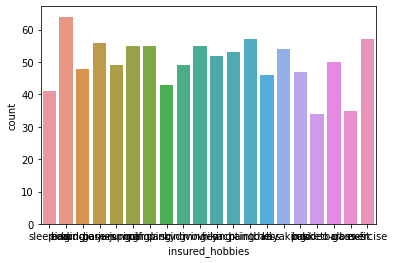

In [11]:
sns.countplot(x='insured_hobbies',data=data)
plt.show()

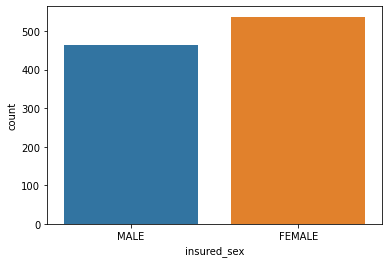

In [12]:
sns.countplot(x='insured_sex',data=data)
plt.show()

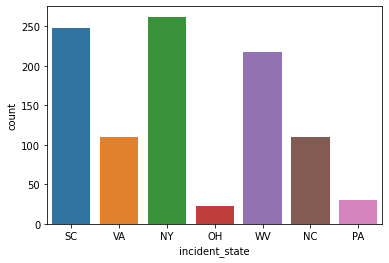

In [13]:
sns.countplot(x='incident_state',data=data)
plt.show()

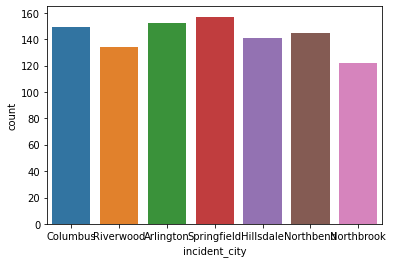

In [14]:
sns.countplot(x='incident_city',data=data)
plt.show()

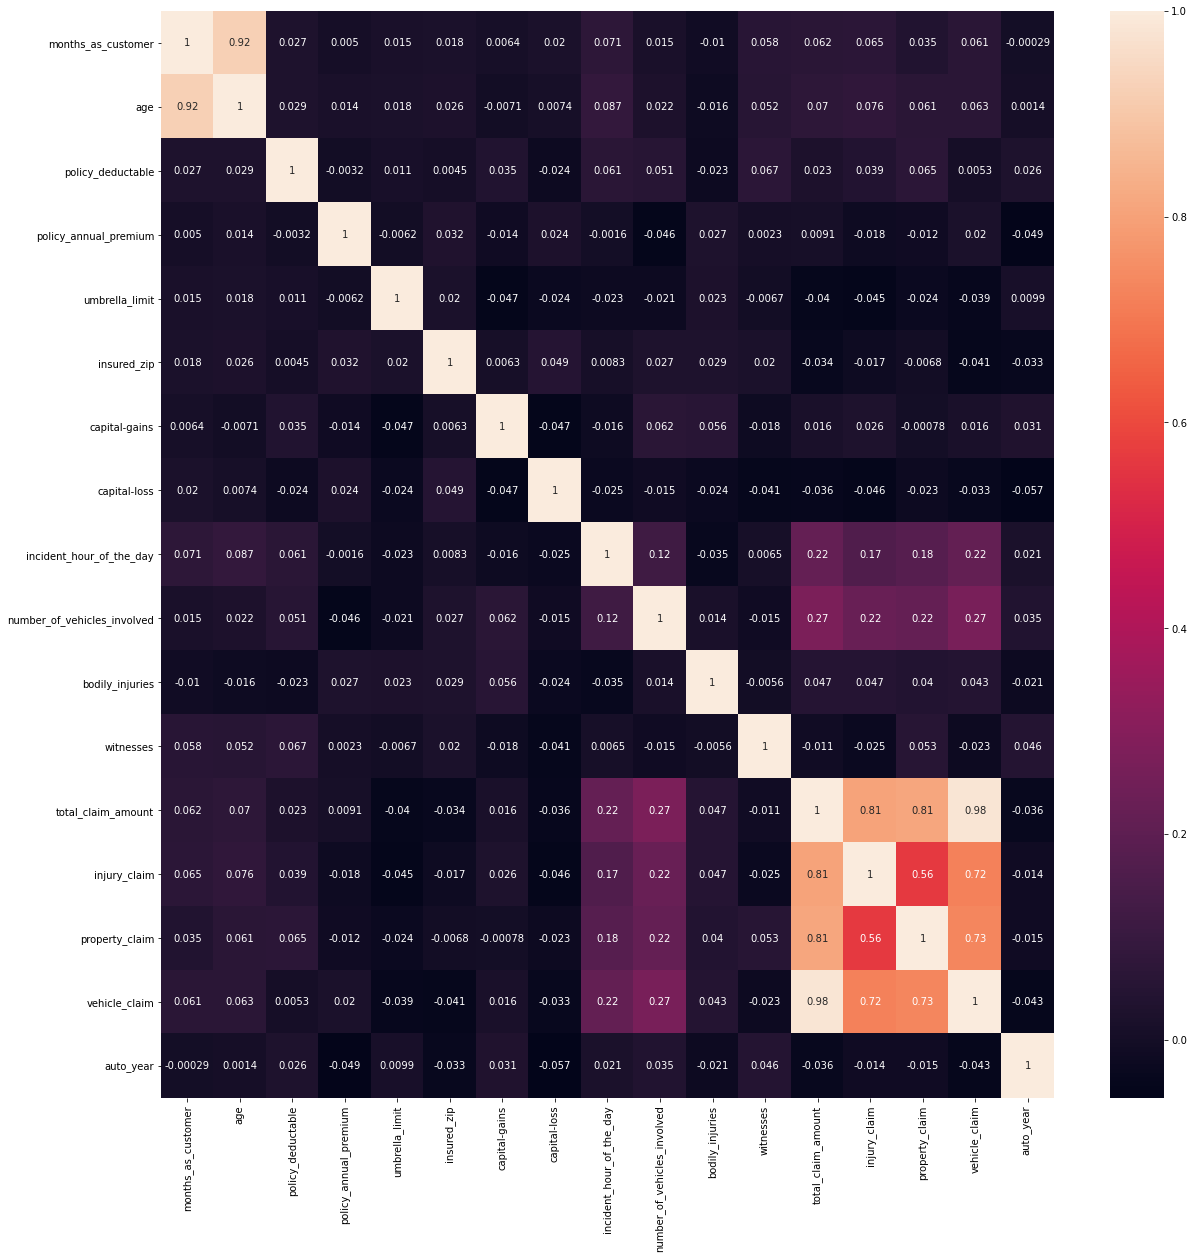

In [15]:
#check multicolinearity
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [16]:
data=data.drop(columns=['total_claim_amount','age'],axis=1)

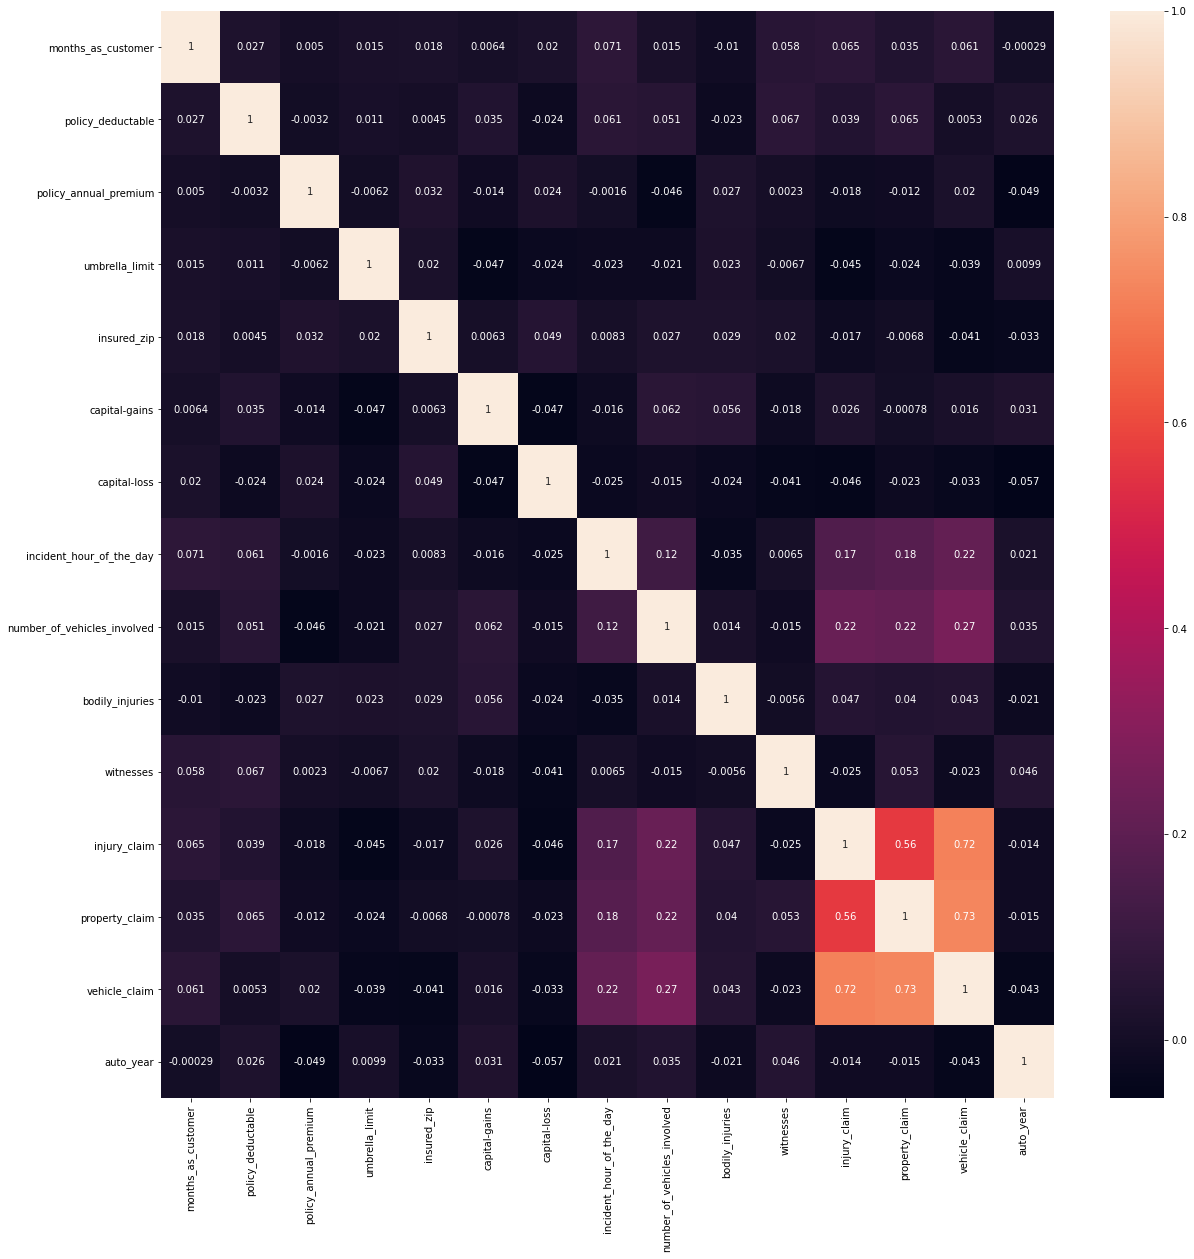

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [18]:
# Lets frist covert categorical data into int 
label = LabelEncoder()
df=label.fit_transform(data['fraud_reported'])
pd.Series(df)
data["fraud_reported"]=df

In [19]:
df=label.fit_transform(data['insured_sex'])
pd.Series(df)
data["insured_sex"]=df

In [20]:
df=label.fit_transform(data['police_report_available'])
pd.Series(df)
data["police_report_available"]=df

In [21]:
df=label.fit_transform(data['property_damage'])
pd.Series(df)
data["property_damage"]=df

In [22]:
df=label.fit_transform(data['authorities_contacted'])
pd.Series(df)
data["authorities_contacted"]=df

In [23]:
# Check the skewness in the dataset
data.skew()

months_as_customer             0.362177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
capital-gains                  0.478850
capital-loss                  -0.391472
authorities_contacted         -0.121744
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

In [24]:
df1=['insured_zip','vehicle_claim','property_damage','police_report_available']  # Seaprate the skewed variables to remove skweness

In [25]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data[df1]=pt.fit_transform(data[df1].values)

In [26]:
data[df1]

,insured_zip,vehicle_claim,property_damage,police_report_available
0,-5.551115e-16,0.753697,1.520282,1.478078
1,-4.996004e-16,-1.786629,-0.657773,-0.676554
2,-1.720846e-15,-0.820881,-0.657773,-0.676554
3,2.164935e-15,0.677602,-0.657773,-0.676554
4,2.164935e-15,-1.740038,-0.657773,-0.676554
...,...,...,...,...
995,-1.720846e-15,1.259186,1.520282,-0.676554
996,2.164935e-15,1.904757,1.520282,-0.676554
997,-1.276756e-15,0.777232,-0.657773,1.478078
998,-1.276756e-15,-0.104258,-0.657773,1.478078


In [27]:
data.head()

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_hobbies,capital-gains,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,OH,250/500,1000,1406.91,0,-5.551115e-16,1,sleeping,53300,...,1,2,1.478078,6510,13020,0.753697,Saab,92x,2004,1
1,228,IN,250/500,2000,1197.22,5000000,-4.996004e-16,1,reading,0,...,0,0,-0.676554,780,780,-1.786629,Mercedes,E400,2007,1
2,134,OH,100/300,2000,1413.14,5000000,-1.720846e-15,0,board-games,35100,...,2,3,-0.676554,7700,3850,-0.820881,Dodge,RAM,2007,0
3,256,IL,250/500,2000,1415.74,6000000,2.164935e-15,0,board-games,48900,...,1,2,-0.676554,6340,6340,0.677602,Chevrolet,Tahoe,2014,1
4,228,IL,500/1000,1000,1583.91,6000000,2.164935e-15,1,board-games,66000,...,0,1,-0.676554,1300,650,-1.740038,Accura,RSX,2009,0


In [28]:
data.shape # recheck the shape

(1000, 30)

In [29]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['policy_state',
 'policy_csl',
 'insured_hobbies',
 'incident_type',
 'collision_type',
 'incident_severity',
 'incident_state',
 'incident_city',
 'auto_make',
 'auto_model']

In [30]:
# Lets use encoding technique to convert categorical data in to numeric by using dummies method
df_dummies=pd.get_dummies(data[cat_col],drop_first=True)
data=data.join(df_dummies) #join to orignal dataset

In [31]:
data.drop(columns=(cat_col),axis=1,inplace=True) # drop the orignal data

In [32]:
data.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,authorities_contacted,incident_hour_of_the_day,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,1000,1406.91,0,-5.551115e-16,1,53300,0,4,5,...,0,0,0,0,0,0,0,0,0,0
1,228,2000,1197.22,5000000,-4.996004e-16,1,0,0,4,8,...,0,0,0,0,0,0,0,0,0,0
2,134,2000,1413.14,5000000,-1.720846e-15,0,35100,0,4,7,...,0,1,0,0,0,0,0,0,0,0
3,256,2000,1415.74,6000000,2.164935e-15,0,48900,-62400,4,5,...,0,0,0,0,0,1,0,0,0,0
4,228,1000,1583.91,6000000,2.164935e-15,1,66000,-46000,2,20,...,0,0,1,0,0,0,0,0,0,0


In [33]:
data.shape #Recheck the dataset shape after dummies tech.

(1000, 114)

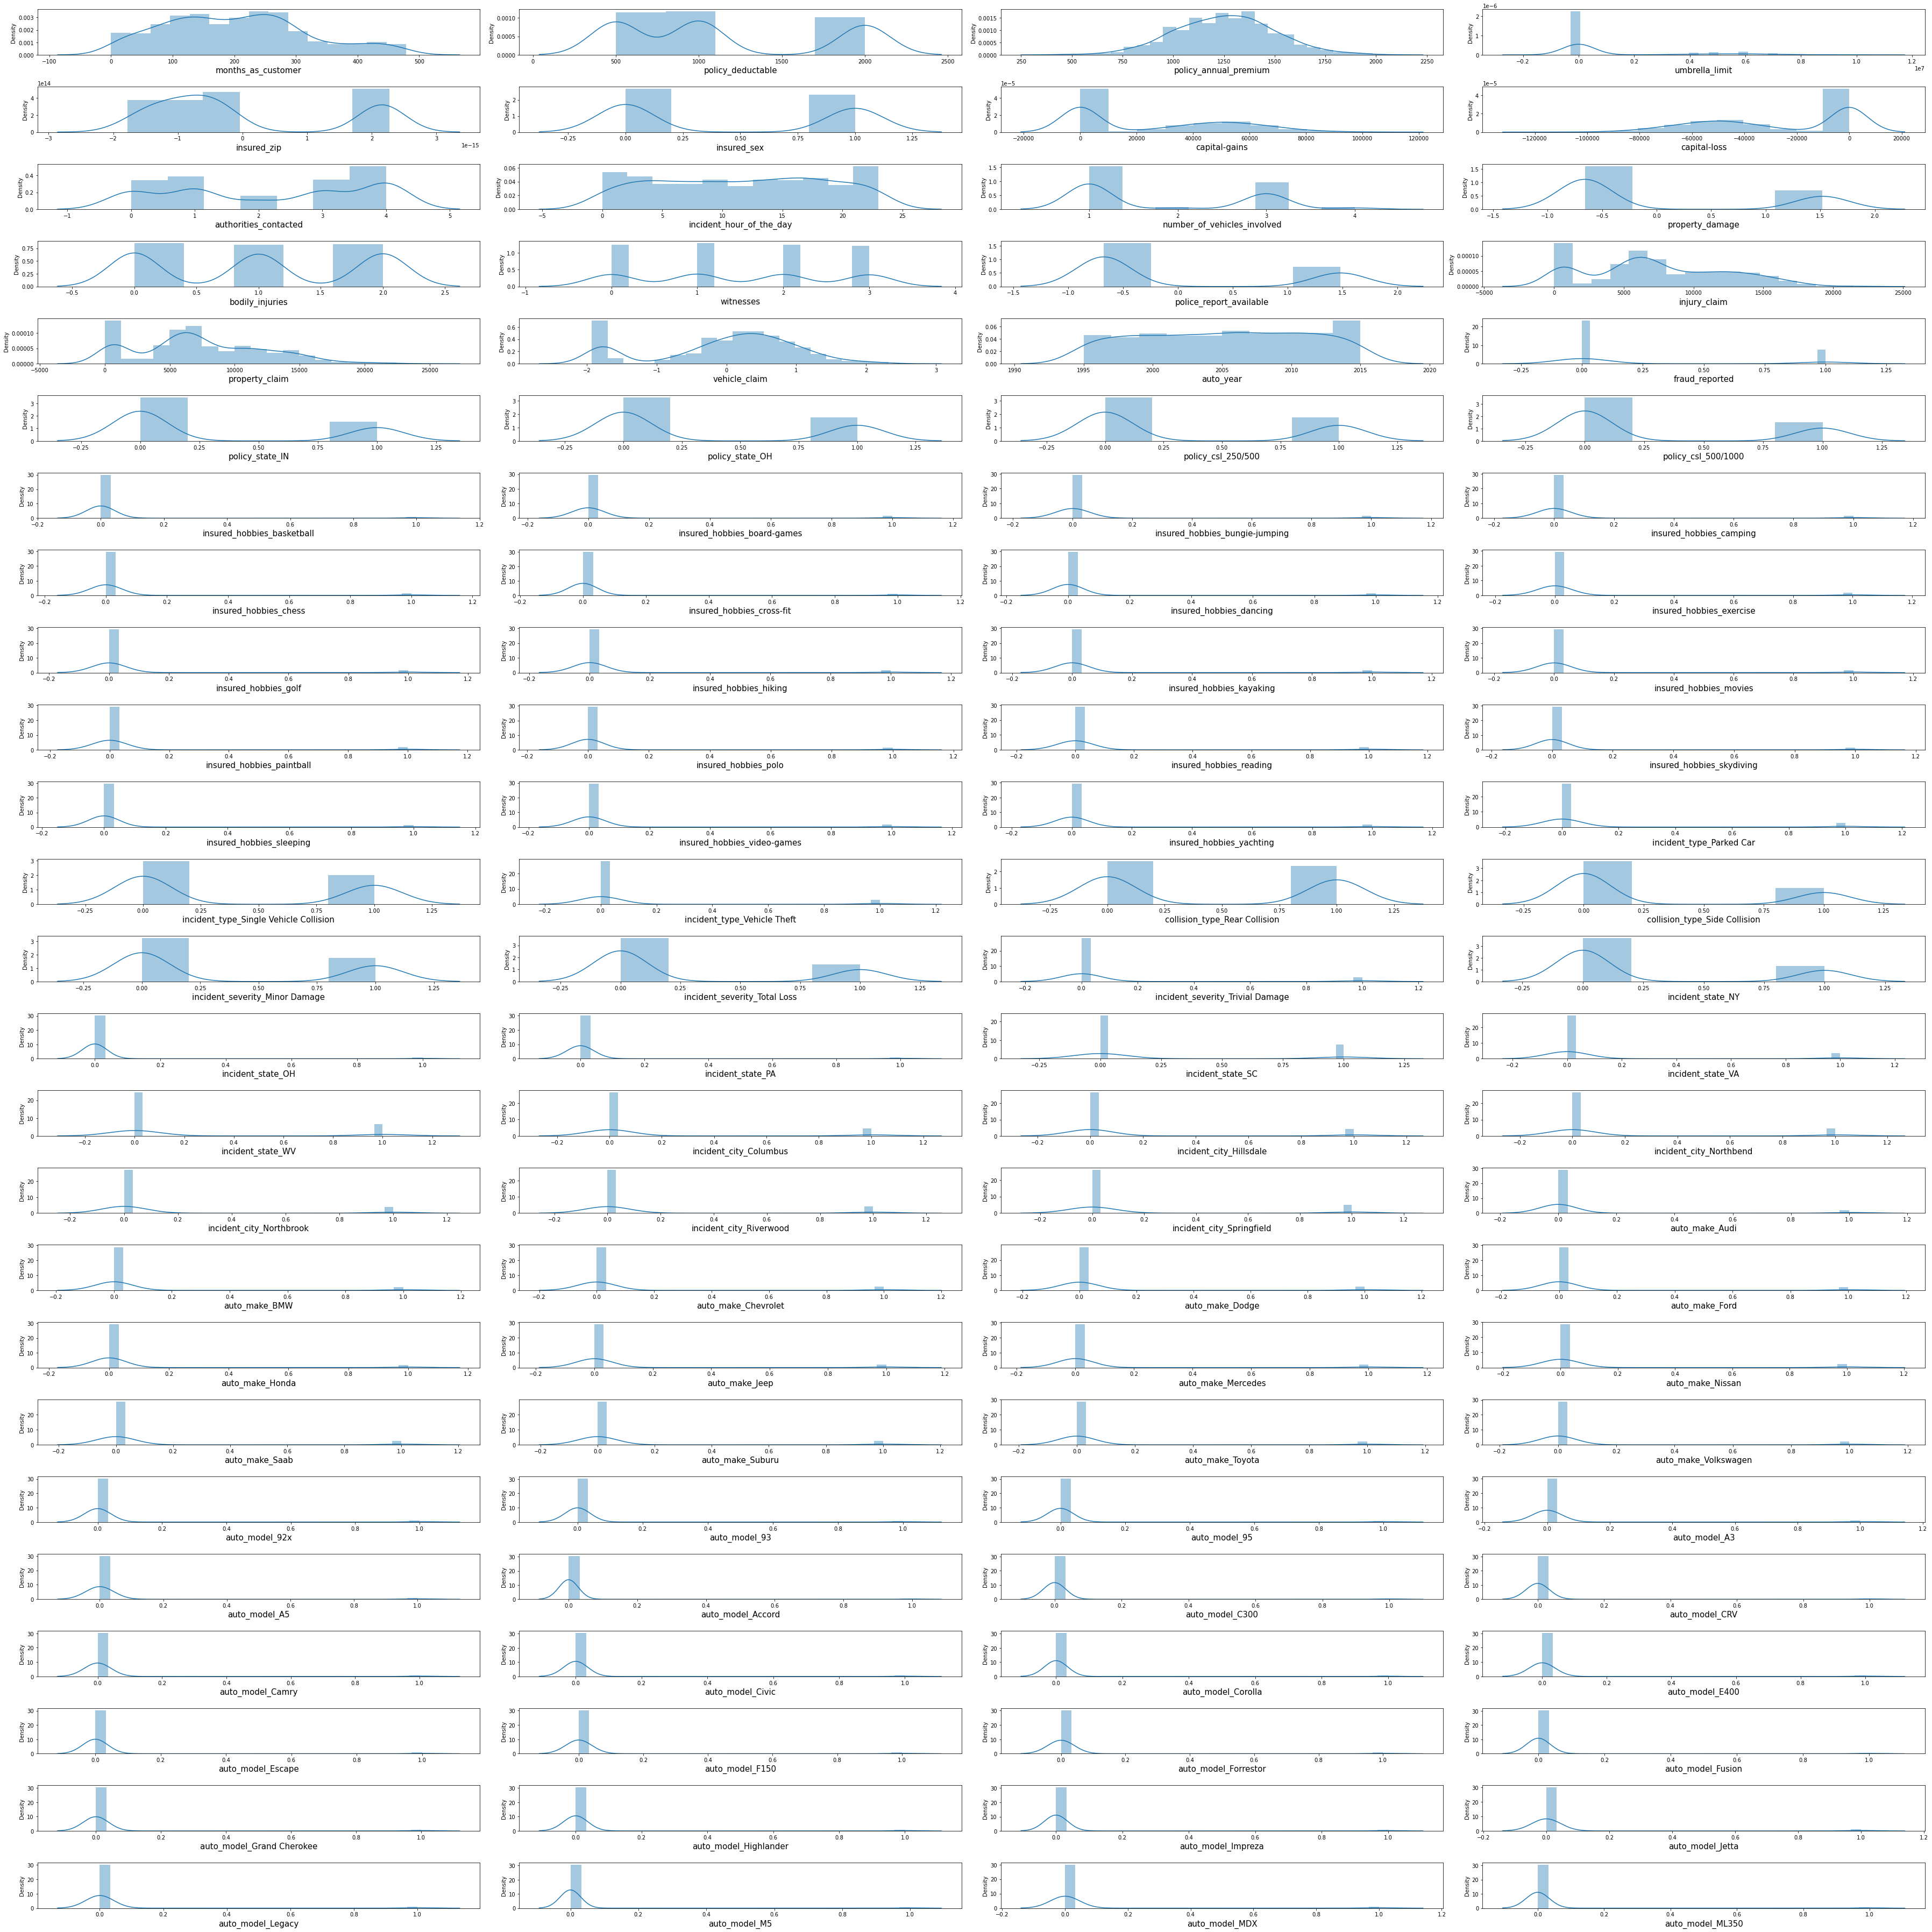

In [34]:
#Let's see the how data is distributed or Graphical analysis of all features
myFig=plt.figure(figsize=(50,50))
plotnumber=1
for column in data:
    if plotnumber<=100:
        ax=plt.subplot(25,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [35]:
# Save the Image
myFig.savefig("myName.svg",format="svg")

In [141]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['fraud_reported'])
y=data['fraud_reported']

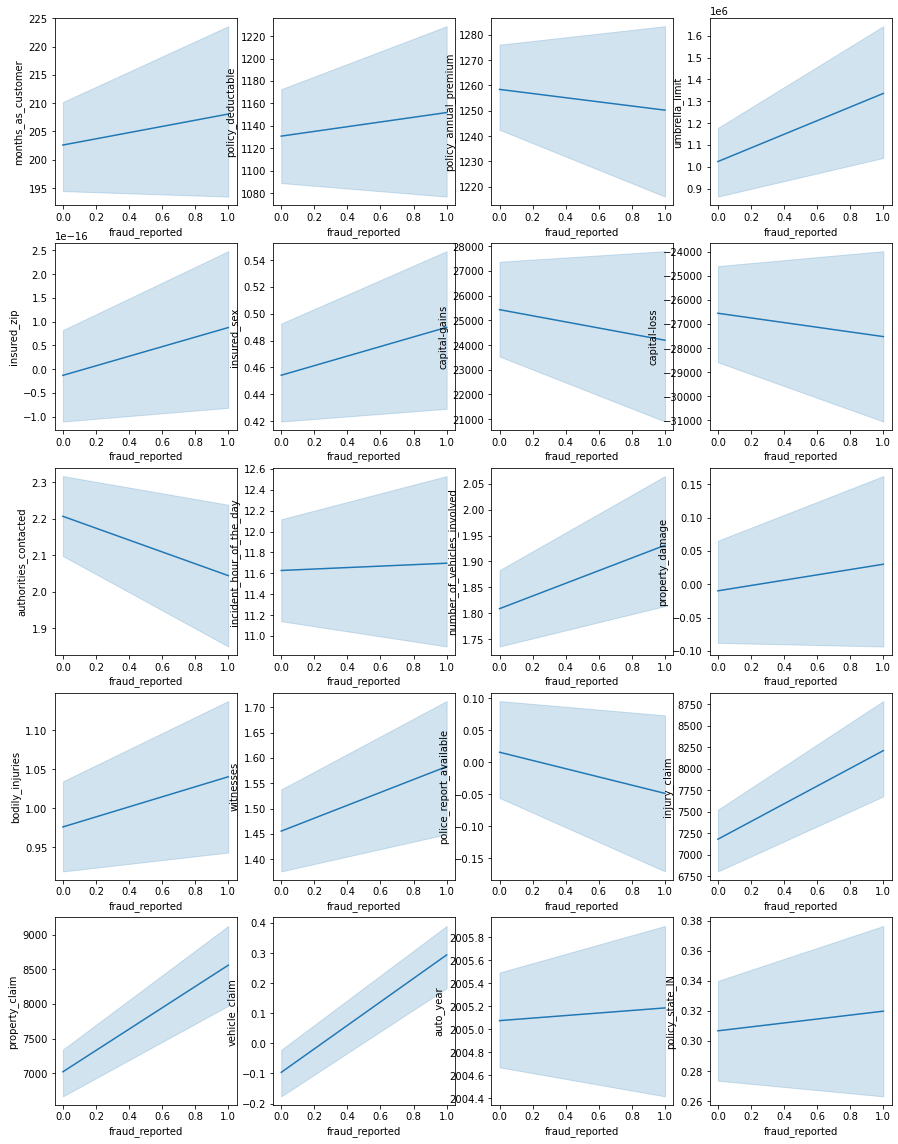

In [38]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [142]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [143]:
print(data['fraud_reported'].value_counts()) # data is imbalanced lets use SMOTE

0    753
1    247
Name: fraud_reported, dtype: int64


In [144]:
# Lets select the proper random state to build best model by using LogisticRegression

from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_train)
    pred=LR.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {accuracy_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {accuracy_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.9042857142857142
at random sate 0, the testing accuracy is:- 0.8233333333333334


at random sate 1, the training accuracy is:- 0.8828571428571429
at random sate 1, the testing accuracy is:- 0.8266666666666667


at random sate 2, the training accuracy is:- 0.8828571428571429
at random sate 2, the testing accuracy is:- 0.8366666666666667


at random sate 3, the training accuracy is:- 0.9028571428571428
at random sate 3, the testing accuracy is:- 0.7966666666666666


at random sate 4, the training accuracy is:- 0.9
at random sate 4, the testing accuracy is:- 0.7933333333333333


at random sate 5, the training accuracy is:- 0.8928571428571429
at random sate 5, the testing accuracy is:- 0.8266666666666667


at random sate 6, the training accuracy is:- 0.8871428571428571
at random sate 6, the testing accuracy is:- 0.82


at random sate 7, the training accuracy is:- 0.8957142857142857
at random sate 7, the testing accuracy is:- 0.79


at random s

at random sate 79, the testing accuracy is:- 0.8366666666666667


at random sate 80, the training accuracy is:- 0.8828571428571429
at random sate 80, the testing accuracy is:- 0.8333333333333334


at random sate 81, the training accuracy is:- 0.8857142857142857
at random sate 81, the testing accuracy is:- 0.8233333333333334


at random sate 82, the training accuracy is:- 0.8857142857142857
at random sate 82, the testing accuracy is:- 0.8566666666666667


at random sate 83, the training accuracy is:- 0.9028571428571428
at random sate 83, the testing accuracy is:- 0.81


at random sate 84, the training accuracy is:- 0.8928571428571429
at random sate 84, the testing accuracy is:- 0.8433333333333334


at random sate 85, the training accuracy is:- 0.8885714285714286
at random sate 85, the testing accuracy is:- 0.84


at random sate 86, the training accuracy is:- 0.8971428571428571
at random sate 86, the testing accuracy is:- 0.83


at random sate 87, the training accuracy is:- 0.89
at rando

In [158]:
#Lets Split data  again into train & test by using this random state
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=65)

In [159]:
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(0.90)
x_train_ns,y_train_ns=ove_smp.fit_sample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 520, 1: 180})
Counter({0: 520, 1: 468})


# Lets build the model to predict the fraud

In [167]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",accuracy_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [168]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [169]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.888663967611336
Test Report: 0.84
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.87      0.89       233
           1       0.62      0.73      0.67        67

    accuracy                           0.84       300
   macro avg       0.77      0.80      0.78       300
weighted avg       0.85      0.84      0.84       300

Confusion Matrix: [[203  30]
 [ 18  49]]
Accuracy: 82.89 %
Standard Deviation: 2.94 %


In [171]:
# Model no.3
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train_ns,y_train_ns)

print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(svc)


Train Report: 0.9888663967611336
Test Report: 0.8266666666666667
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.95      0.90       233
           1       0.70      0.39      0.50        67

    accuracy                           0.83       300
   macro avg       0.77      0.67      0.70       300
weighted avg       0.81      0.83      0.81       300

Confusion Matrix: [[222  11]
 [ 41  26]]
Accuracy: 86.23 %
Standard Deviation: 4.25 %


In [172]:
#Model no.4
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.82
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88       233
           1       0.60      0.60      0.60        67

    accuracy                           0.82       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.82      0.82      0.82       300

Confusion Matrix: [[206  27]
 [ 27  40]]
Accuracy: 80.87 %
Standard Deviation: 4.15 %


In [173]:
#Model no.5
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()

ada.fit(x_train_ns,y_train_ns)

print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(ada)

Train Report: 0.9068825910931174
Test Report: 0.8566666666666667
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.91      0.91       233
           1       0.69      0.66      0.67        67

    accuracy                           0.86       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.85      0.86      0.86       300

Confusion Matrix: [[213  20]
 [ 23  44]]
Accuracy: 76.82 %
Standard Deviation: 12.45 %


In [170]:
# Model no.2
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 1.0
Test Report: 0.8
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.96      0.88       233
           1       0.63      0.25      0.36        67

    accuracy                           0.80       300
   macro avg       0.72      0.61      0.62       300
weighted avg       0.78      0.80      0.77       300

Confusion Matrix: [[223  10]
 [ 50  17]]
Accuracy: 81.07 %
Standard Deviation: 11.44 %


In [175]:
# Hyper tuning by using GridSearchCV

from sklearn.model_selection import GridSearchCV

para={'max_depth':[20,3,40,6,10],'random_state':[41,35,56,300],'n_estimators':[20,30,75,64,45],'criterion':['gini','entropy']}
grid=GridSearchCV(estimator=rand_clf, param_grid=para,cv=2)
grid.fit(x_train_ns,y_train_ns)

print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 45, 'random_state': 56}


In [182]:
rand_clf= RandomForestClassifier(n_estimators=45, max_depth=3, criterion='gini',random_state=56)
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 0.881578947368421
Test Report: 0.8566666666666667
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.91      0.91       233
           1       0.68      0.69      0.68        67

    accuracy                           0.86       300
   macro avg       0.79      0.80      0.79       300
weighted avg       0.86      0.86      0.86       300

Confusion Matrix: [[211  22]
 [ 21  46]]
Accuracy: 82.49 %
Standard Deviation: 7.39 %


# Looking at accuracy, ROC AUC Curve & confusion matrix i m selecting RandomForestClassifier Hyper tuning by using GridSearchCV with Kfold cross validation method

# lets check ROC AUC curve for fitted model

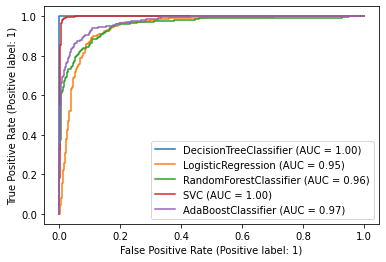

In [185]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(LR,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(svc,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(ada,x_train_ns,y_train_ns,ax=disp.ax_)

# Lets check how our model works on test data¶

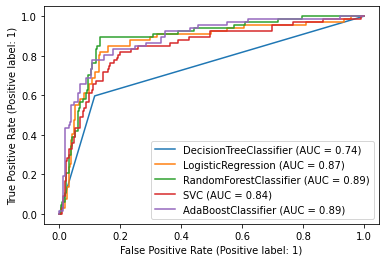

In [186]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)

In [187]:
#save model
import pickle
Filename='Finalized_model_insurance_claim.pickle'
pickle.dump(svc,open(Filename,'wb'))